# 4.1 Анализ доходности: 

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

## Справочники

In [3]:
Companies = pd.read_excel('Companies.xlsx')
Sector = pd.read_excel('Sector.xlsx')
infoS = pd.read_excel('InfoS.xlsx')
StatementS = pd.read_excel('StatementS.xlsx')

## Данные

In [4]:
Info = pd.read_csv('Info')
Quotes = pd.read_csv('Quotes')
Statements = pd.read_csv('Statements')

## Индексы

In [5]:
Quotes = Quotes.set_index("Ticker")
Statements = Statements.set_index("Ticker")
Info = Info.set_index("Ticker")
StatementS = StatementS.set_index("id")
infoS = infoS.set_index("id")
Sector = Sector.set_index("idSector")
Companies = Companies.set_index("Ticker")

In [758]:
np.random.seed(12345)
# name_company = Quotes.sample(10).index.tolist() # возьмем случайным образом тикеры 10 компаний
name_company = random.choices(Quotes.index.tolist(), k=10)

# 4.1.1. Анализ положений, связанных с инвестированием согласно теории Г.Марковица

## Нормальное распределение доходностей (дневных)

Коэф. ассиметрии = -0.2904678677670298, Коэф. Куртозиса - 3 = 3.5601612492677344
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.9251388311386108, pvalue=3.480967323455848e-32)


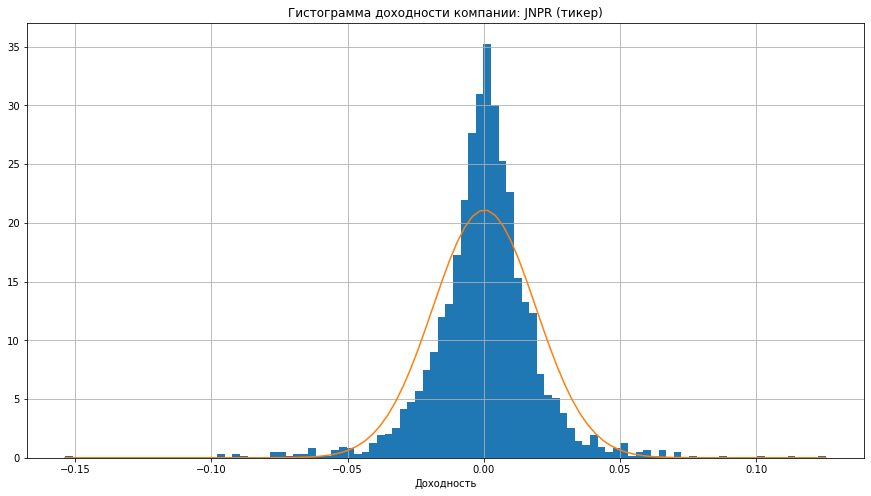

Коэф. ассиметрии = 0.9543576006572908, Коэф. Куртозиса - 3 = 32.094387410061245
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.7977551221847534, pvalue=0.0)


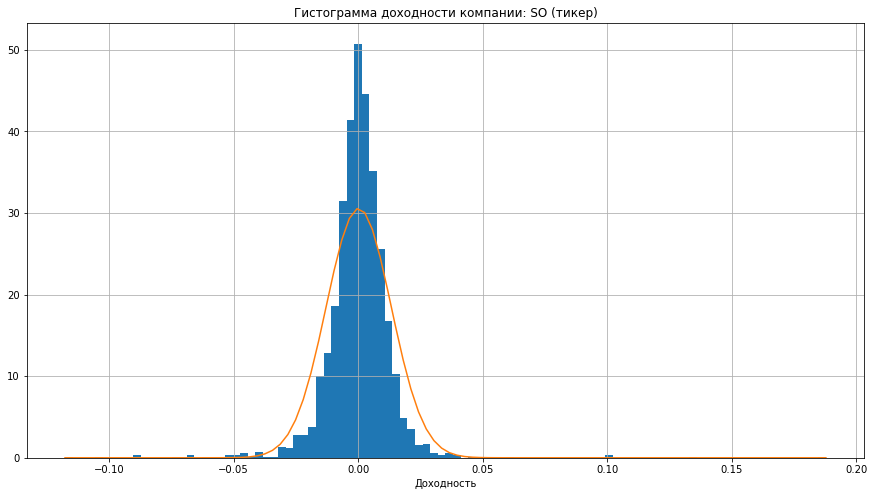

Коэф. ассиметрии = 0.6475932478759319, Коэф. Куртозиса - 3 = 16.098865967743365
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8449559211730957, pvalue=1.708182828011952e-42)


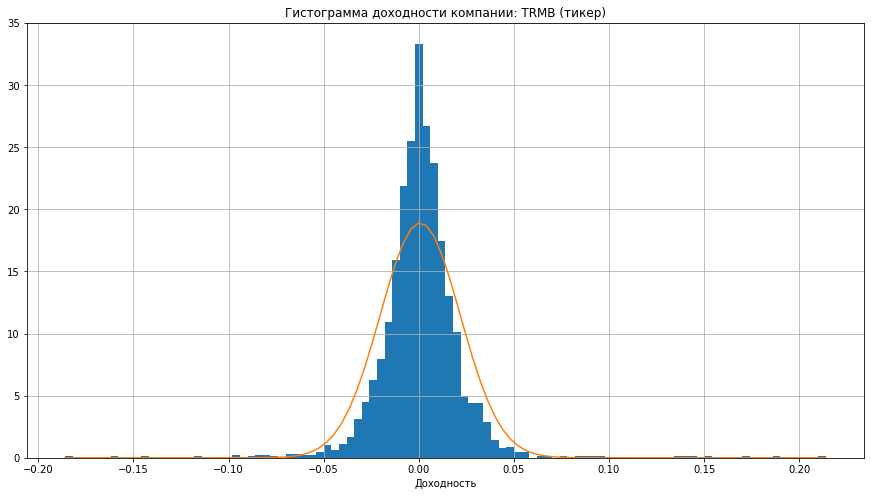

Коэф. ассиметрии = -0.21830681228935475, Коэф. Куртозиса - 3 = 6.275590168776725
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.9211946725845337, pvalue=7.305260253398805e-33)


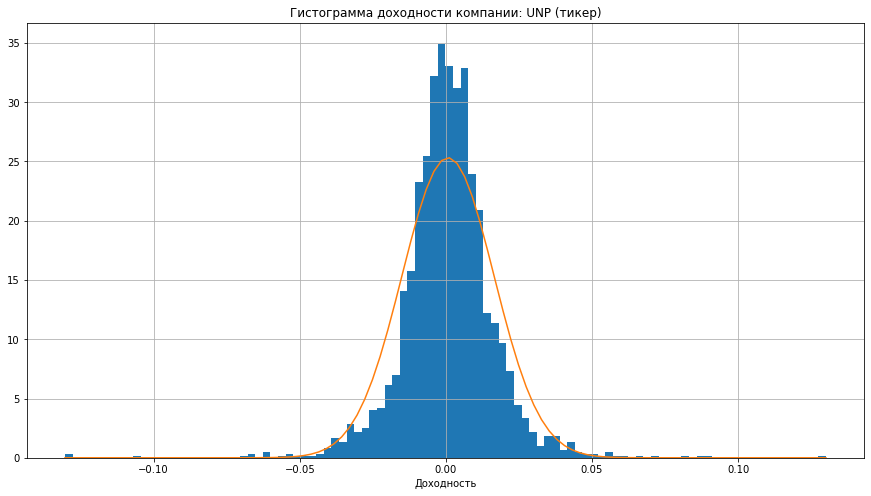

Коэф. ассиметрии = -0.24882113512587462, Коэф. Куртозиса - 3 = 11.656895644277617
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8781613707542419, pvalue=6.466160041571222e-39)


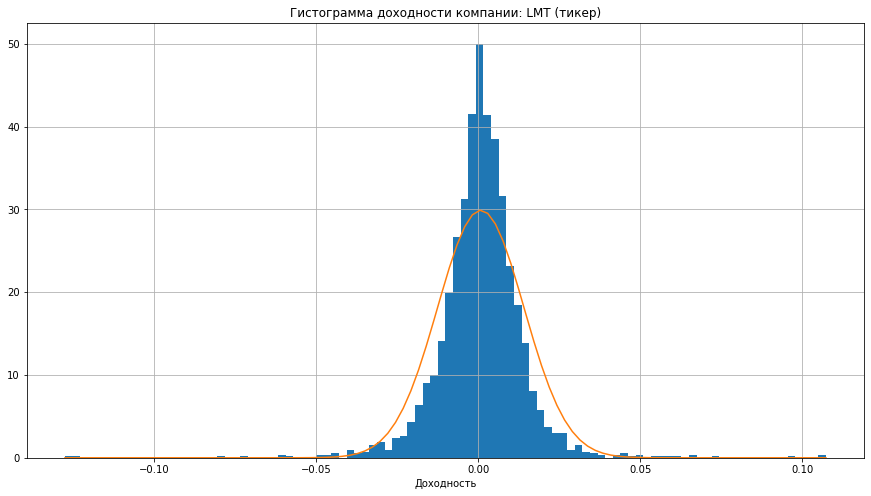

Коэф. ассиметрии = -0.32227428838693, Коэф. Куртозиса - 3 = 17.26404290506195
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.83977210521698, pvalue=5.394999087650546e-43)


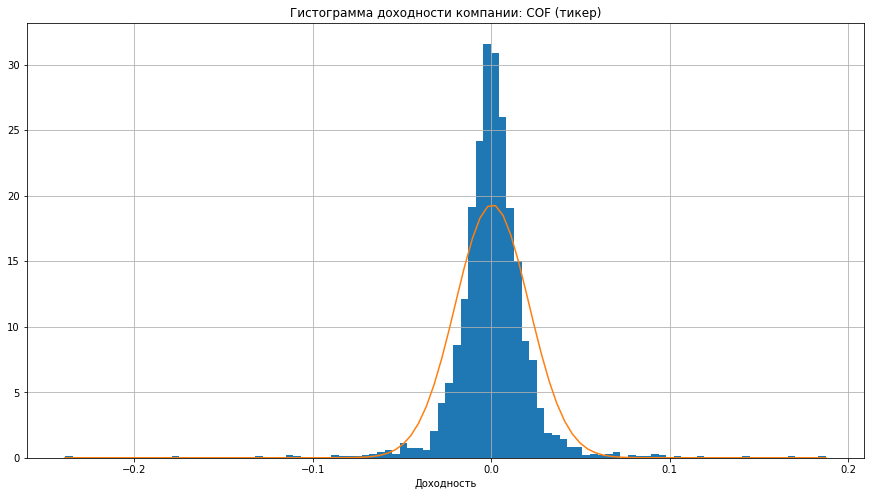

Коэф. ассиметрии = 0.10335070514951868, Коэф. Куртозиса - 3 = 7.412733710361637
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.9078075885772705, pvalue=5.567384609559172e-35)


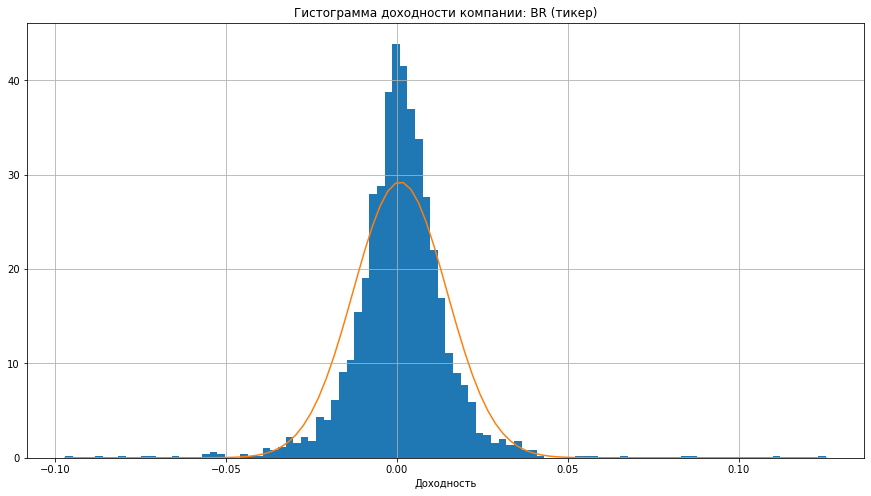

Коэф. ассиметрии = -0.5767771089556273, Коэф. Куртозиса - 3 = 17.677216316412093
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8399940133094788, pvalue=5.661245795872261e-43)


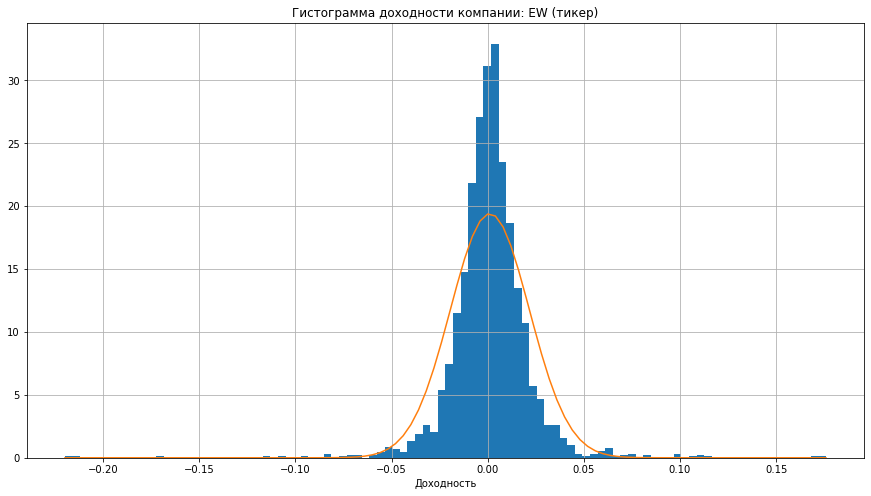

Коэф. ассиметрии = -0.09708244561298723, Коэф. Куртозиса - 3 = 17.560152162470388
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8587334156036377, pvalue=4.301285636245026e-41)


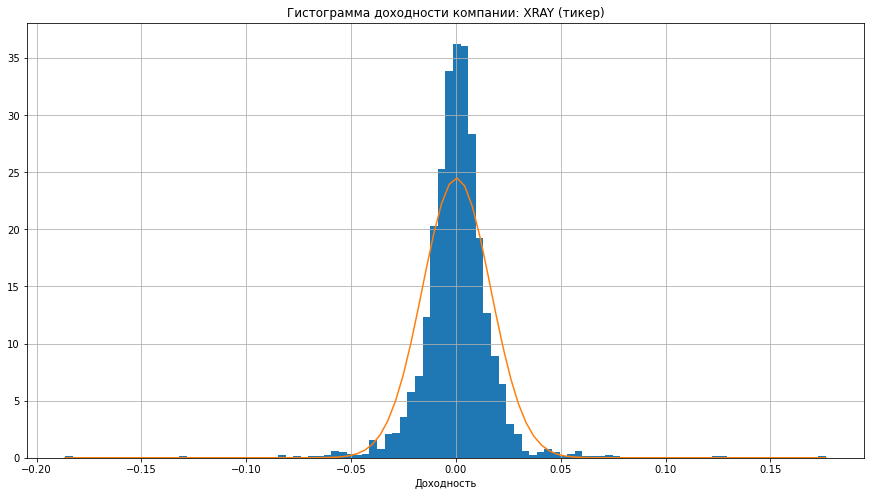

Коэф. ассиметрии = -0.2350271812210404, Коэф. Куртозиса - 3 = 10.041414551940795
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8926982879638672, pvalue=4.274945485063051e-37)


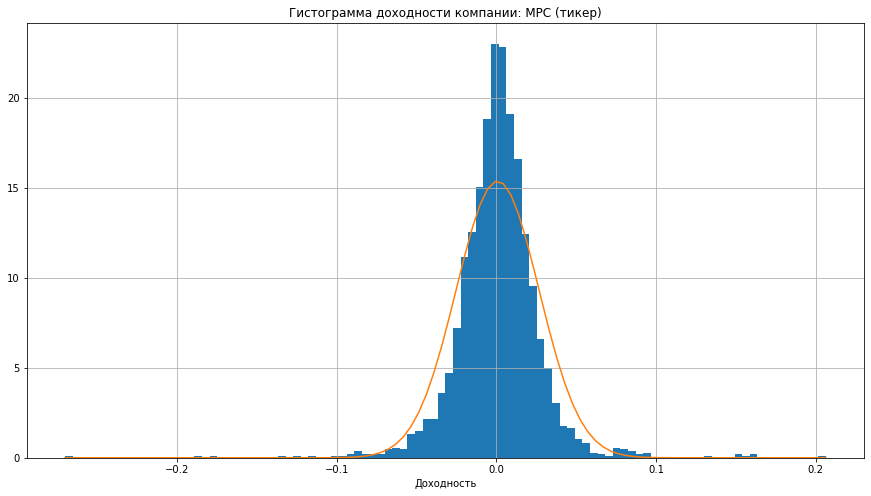

In [791]:
N = 100 # число бинов гистограммы
for name in name_company:
    df1 = Quotes.loc[name].sort_values(by = 'Date')
    df2 = df1['Close'].pct_change(axis = 'rows')
    plt.figure(figsize=(15, 8))
    plt.hist(df2, density=True, bins=N)
    x = np.linspace(df2.min(), df2.max(), N)
    print(f"Коэф. ассиметрии = {df2.skew()}, Коэф. Куртозиса - 3 = {df2.kurt()-3}")
    print(f"Шапиро тест на нормальность доходностей {stats.shapiro(np.array(df2)[1:])}")
    plt.plot(x, stats.norm.pdf(x, df2.mean(), df2.std()))
    plt.grid()
    plt.title(f"Гистограмма доходности компании: {name} (тикер)")
    plt.xlabel('Доходность')
    plt.show()
    plt.show()

Вывод - виуально распределения доходностей случайных 10 компаний отличаются от нормального распределения. Имеются выбросы. В качестве оценки, были для каждого распределения доходностей посчитаны коэф. ассиметрии и куртозиса. Коэф. куртозиса существенно больше, чем у нормального распределения, это обьясняет длинные хвосты и появление выбросов. В основном коэф. ассиметрии меньше нуля, то есть распределение скошено вправо, оно не симметрично, как нормальное. Был проведен Тест Шапиро на нормальность распределния, везде получилось очень маленькое p значение, значит 0 гипотезу отклоняем при любом "разумном" уровне значимости.

## Логарифмические доходности (дневные)

Коэф. ассиметрии = -0.5367176259268485, Коэф. Куртозиса - 3 = 4.126169580049812
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.921174168586731, pvalue=7.247468543008566e-33)


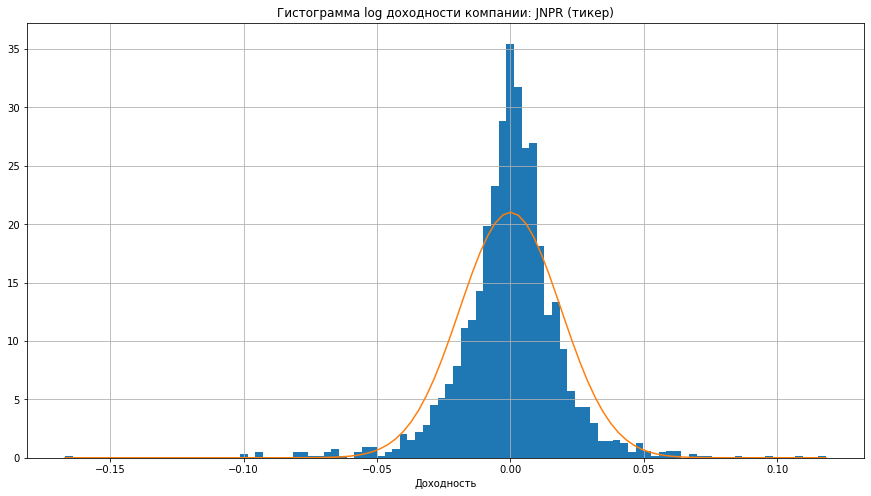

Коэф. ассиметрии = 0.2981827767590829, Коэф. Куртозиса - 3 = 27.27907669344184
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8037245273590088, pvalue=0.0)


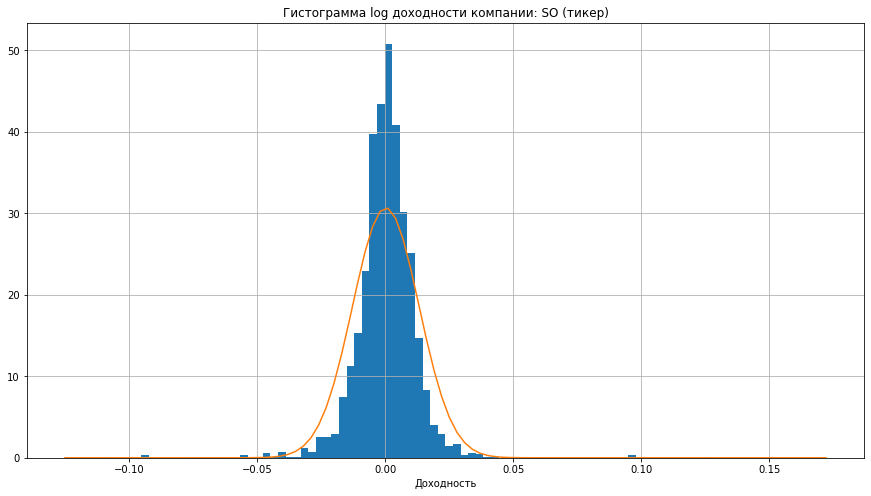

Коэф. ассиметрии = 0.008197756798381048, Коэф. Куртозиса - 3 = 15.248150116086705
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8487003445625305, pvalue=4.0091149064333016e-42)


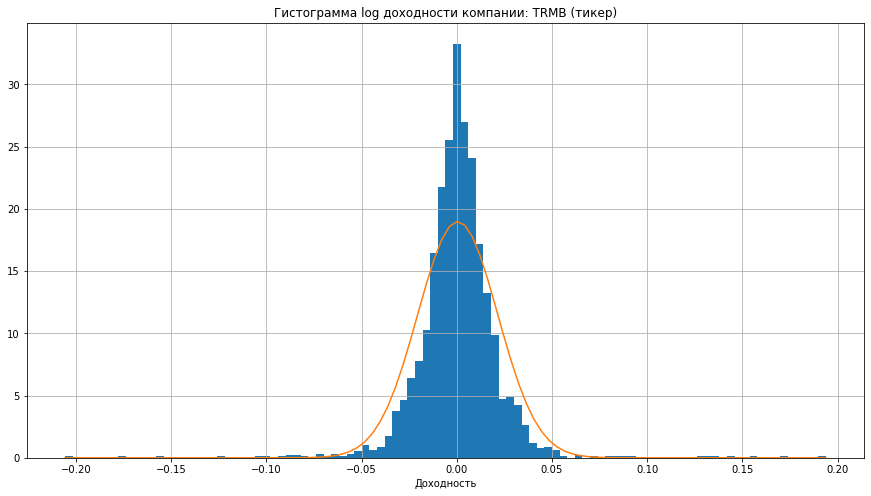

Коэф. ассиметрии = -0.4917562286131467, Коэф. Куртозиса - 3 = 7.102772777067052
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.9175621271133423, pvalue=1.829806648913628e-33)


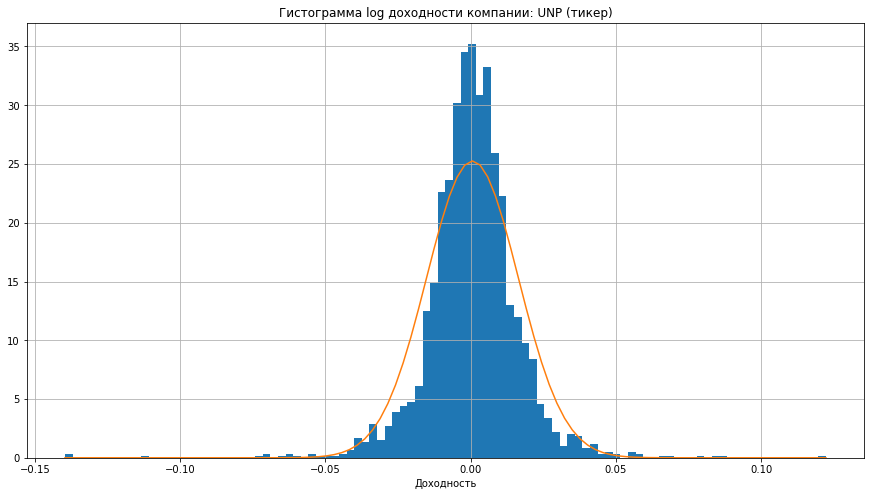

Коэф. ассиметрии = -0.5908720462856049, Коэф. Куртозиса - 3 = 12.855220672687969
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8747674226760864, pvalue=2.576524046101647e-39)


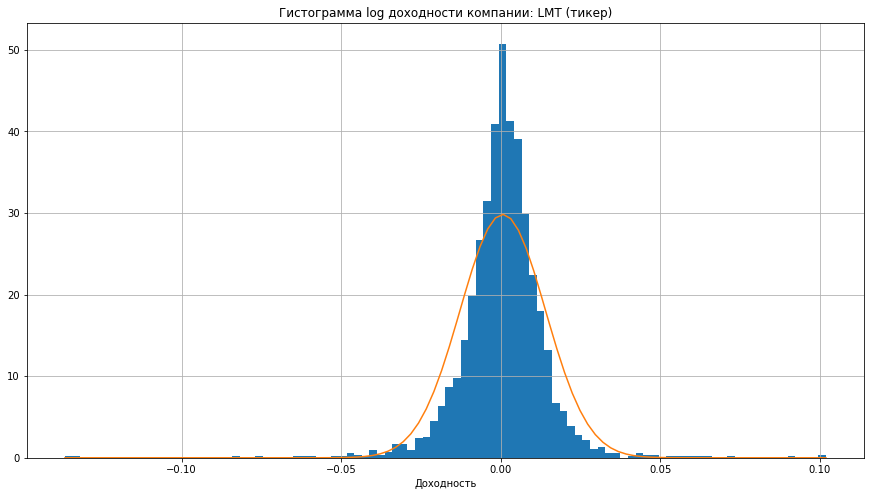

Коэф. ассиметрии = -1.0691827792483846, Коэф. Куртозиса - 3 = 21.80601346502794
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8301661014556885, pvalue=6.866362475191604e-44)


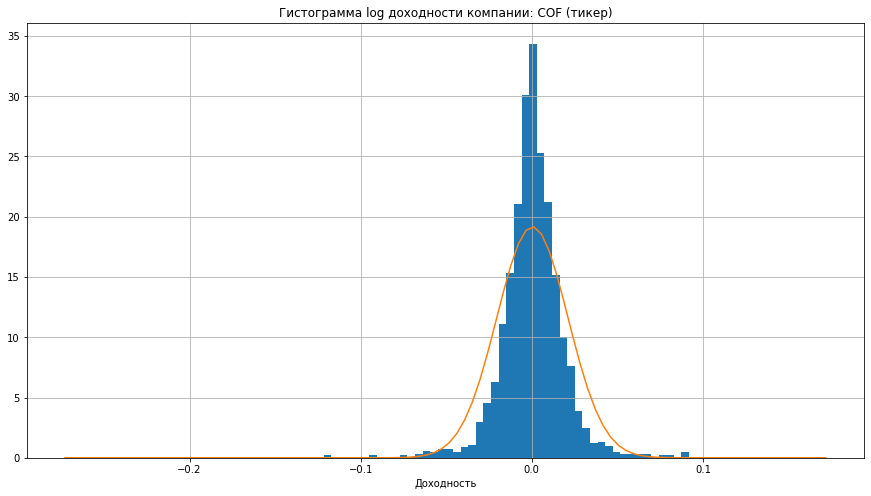

Коэф. ассиметрии = -0.1435813932647332, Коэф. Куртозиса - 3 = 6.919826665354259
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.9082512259483337, pvalue=6.483339794830106e-35)


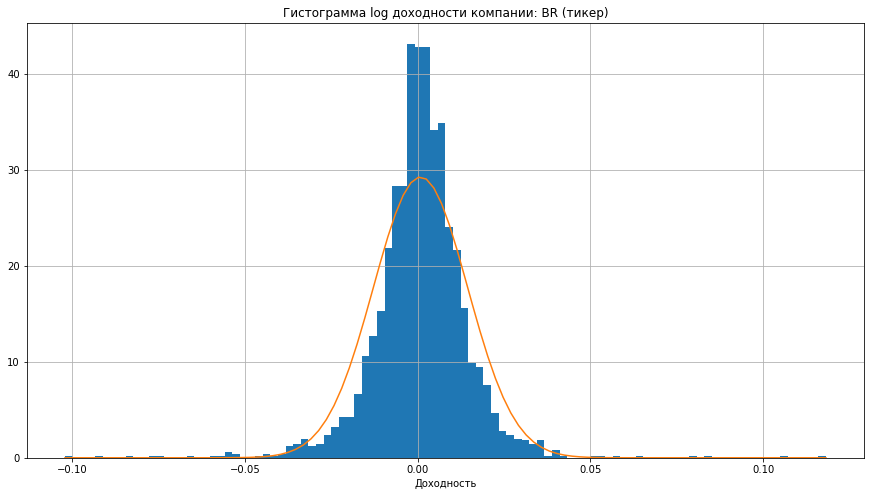

Коэф. ассиметрии = -1.3333572237438769, Коэф. Куртозиса - 3 = 22.877255801763802
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.826956570148468, pvalue=3.5032461608120427e-44)


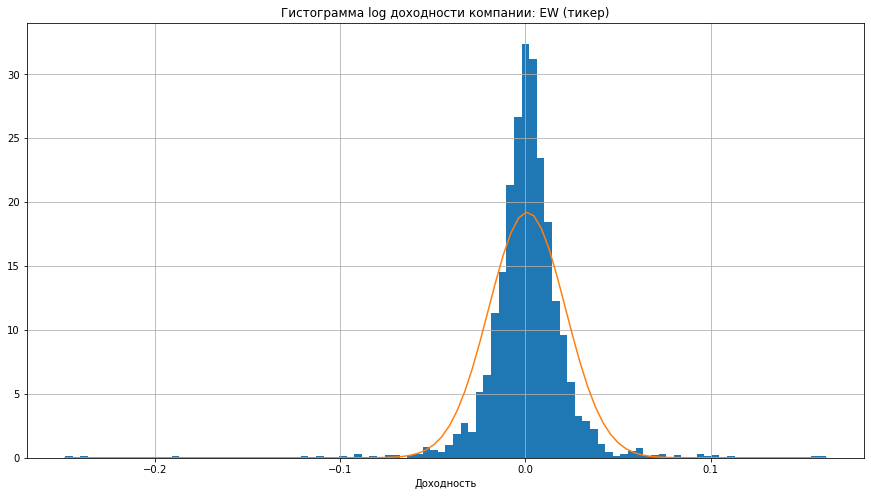

Коэф. ассиметрии = -0.6648665389919082, Коэф. Куртозиса - 3 = 19.385313741597702
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8549380302429199, pvalue=1.7256990588160122e-41)


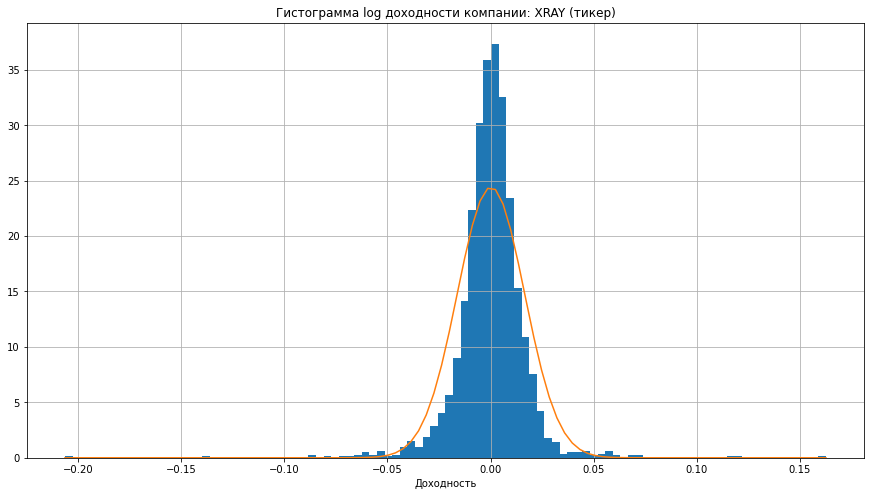

Коэф. ассиметрии = -0.8818396133770917, Коэф. Куртозиса - 3 = 13.743466390454767
Шапиро тест на нормальность доходностей ShapiroResult(statistic=0.8830826282501221, pvalue=2.5488116874114666e-38)


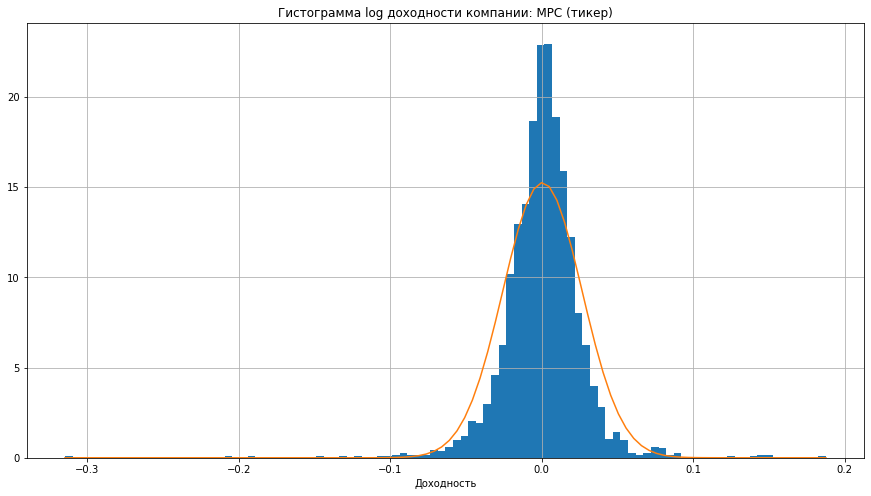

In [792]:
for name in name_company:
    df1 = Quotes.loc[name].sort_values(by = 'Date')
    df2 = df1["Close"].apply(np.log).diff()
    print(f"Коэф. ассиметрии = {df2.skew()}, Коэф. Куртозиса - 3 = {df2.kurt()-3}")
    print(f"Шапиро тест на нормальность доходностей {stats.shapiro(np.array(df2)[1:])}")
    plt.figure(figsize=(15, 8))
    plt.hist(df2, bins=N, density=True)
    x = np.linspace(df2.min(), df2.max(), N)
    plt.plot(x, stats.norm.pdf(x, df2.mean(), df2.std()))
    plt.grid()
    plt.title(f"Гистограмма log доходности компании: {name} (тикер)")
    plt.xlabel('Доходность')
    plt.show()

## Логнормальное распределение

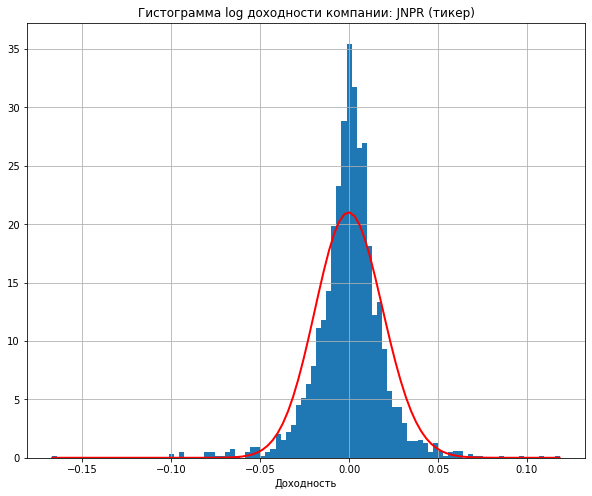

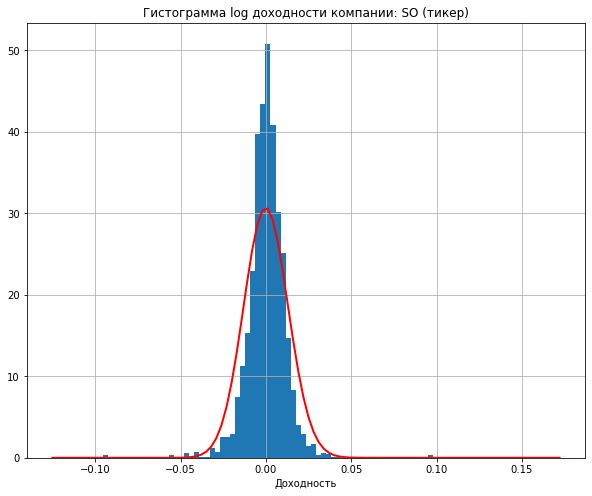

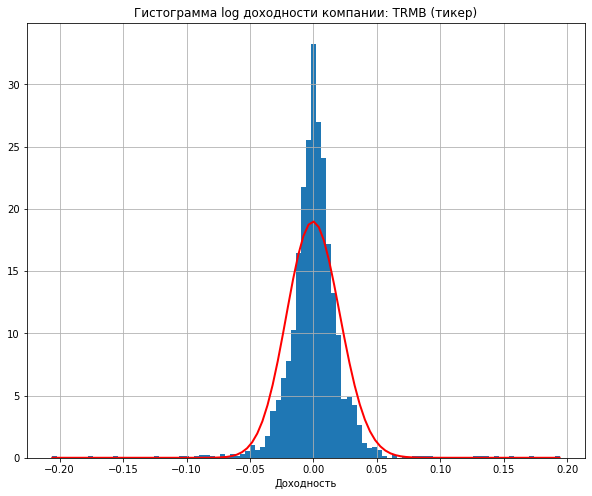

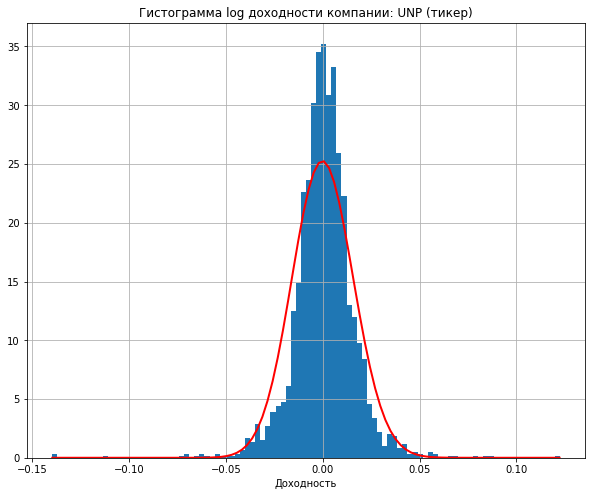

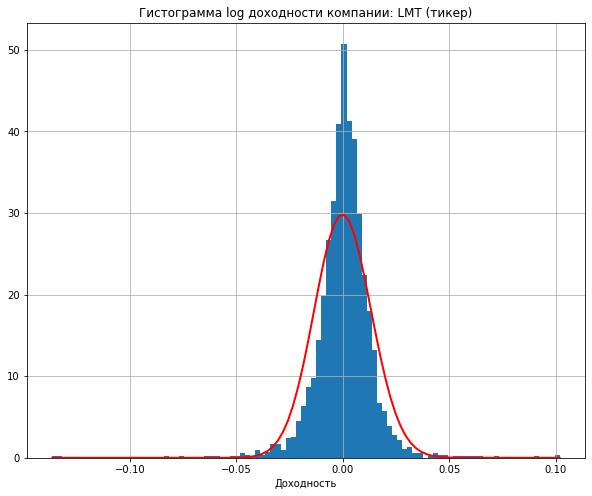

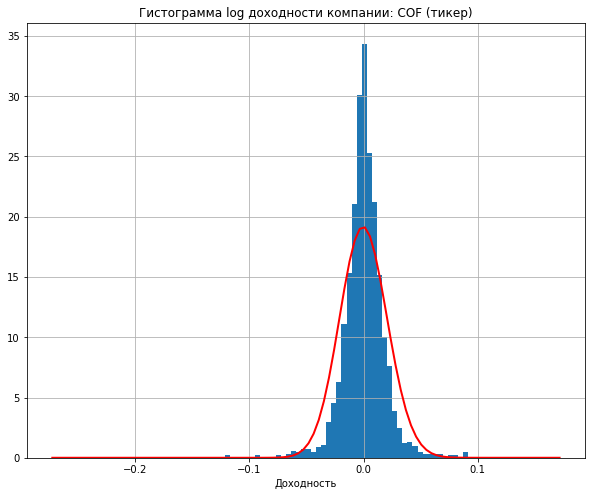

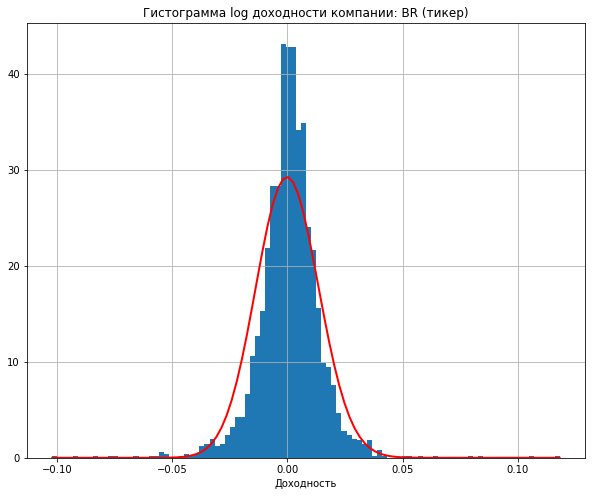

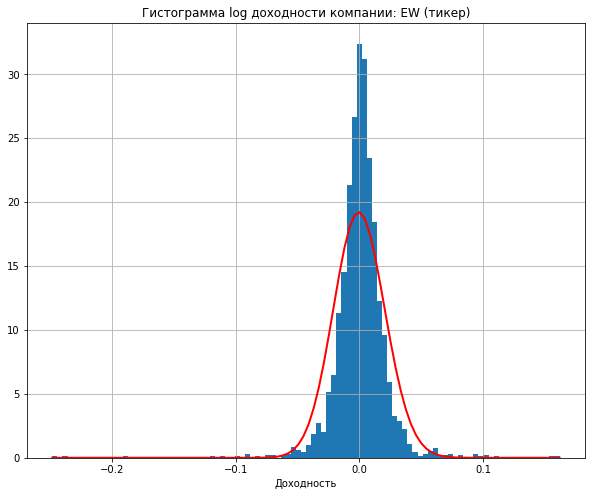

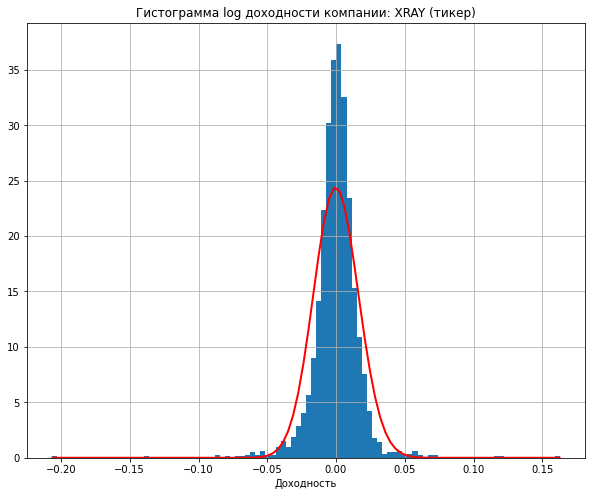

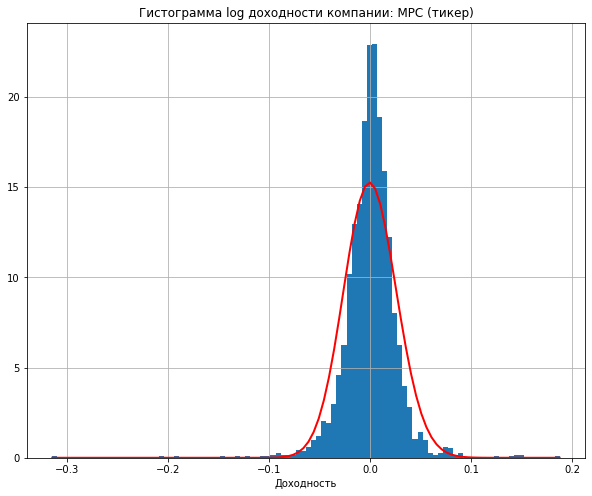

In [830]:
for name in name_company:
    df1 = Quotes.loc[name].sort_values(by = 'Date')
    df2 = df1["Close"].apply(np.log).diff()
    plt.figure(figsize=(10, 8))
    plt.hist(df2, bins=N, density=True)
    x = np.linspace(df2.min()+1, df2.max()+1, N)
    plt.plot(x-1, stats.lognorm.pdf(x, df2.std()),'r-', lw=2, alpha=1, label='lognorm pdf')
    plt.grid()
    plt.title(f"Гистограмма log доходности компании: {name} (тикер)")
    plt.xlabel('Доходность')
    plt.show()

In [6]:
Quotes

,Date,Close
Ticker,,
A,2012-01-03,26.094421
AAL,2012-01-03,5.120000
AAP,2012-01-03,69.099998
AAPL,2012-01-03,14.686786
ABC,2012-01-03,38.070000
...,...,...
YUM,2020-12-31,108.559998
ZBH,2020-12-31,154.089996
ZBRA,2020-12-31,384.329987


## Стабильность риска доходностей (дневных доходностей, усредненных по месяцам)

In [8]:
Quotes1=Quotes.reset_index()
Quotes1['Date'] = pd.to_datetime(Quotes1['Date'])
Quotes1 = Quotes1.pivot(index='Date', columns='Ticker', values='Close')
Quotes1 = Quotes1.pct_change(axis = 'rows') # считаем доходности
Quotes1['year'], Quotes1['month'] = Quotes1.index.year, Quotes1.index.month

In [9]:
Quotes2 = Quotes1.groupby(['year','month']).transform('std').drop_duplicates()

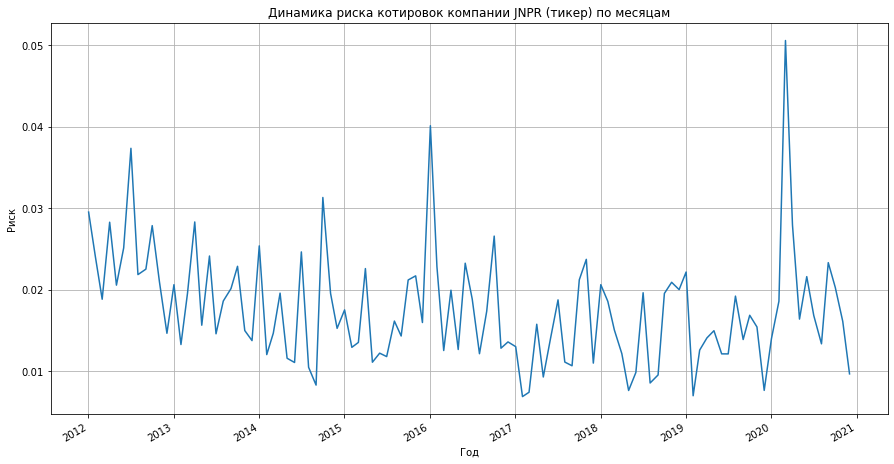

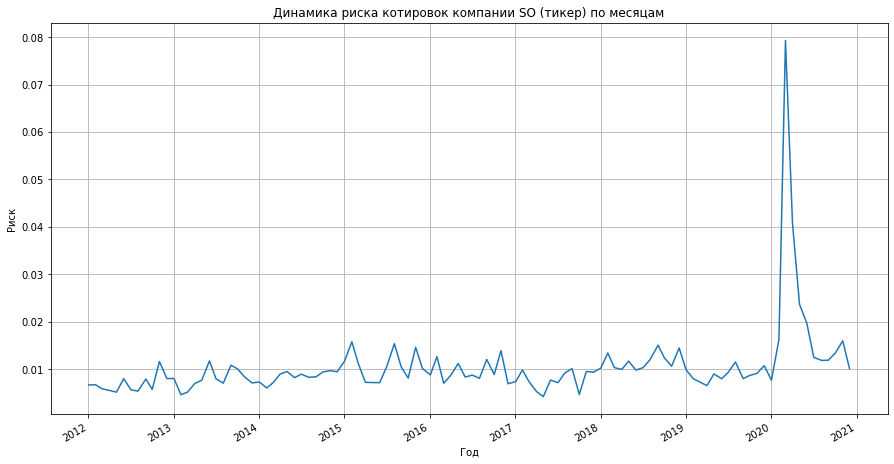

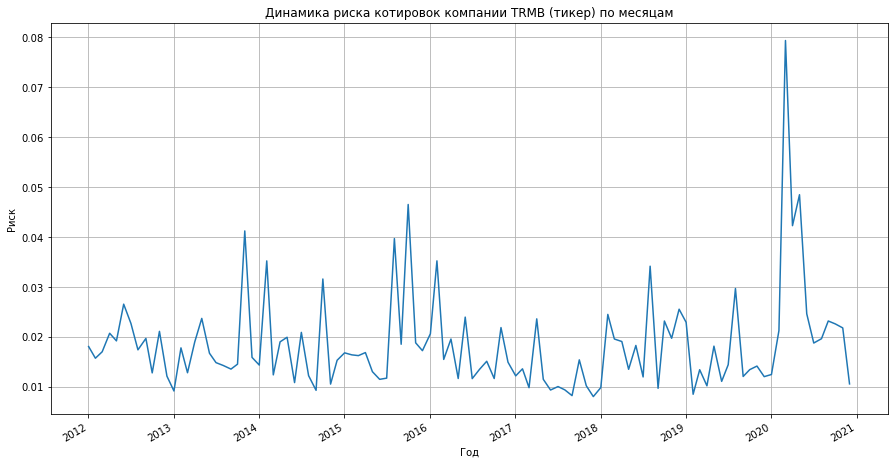

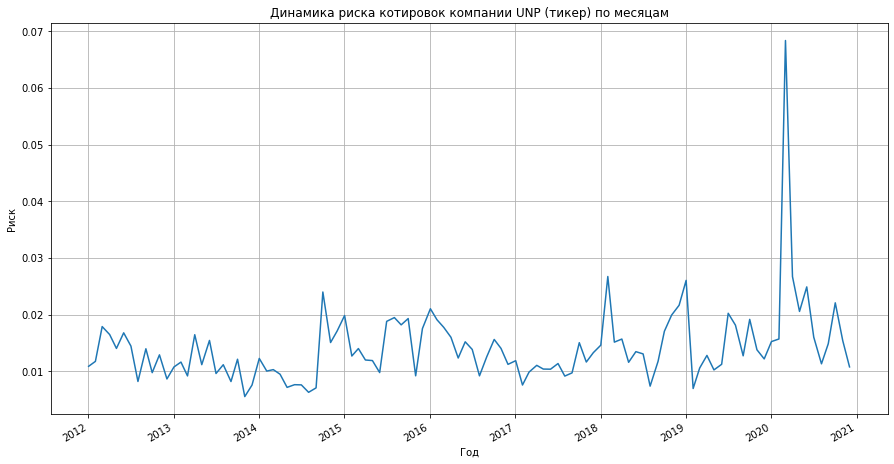

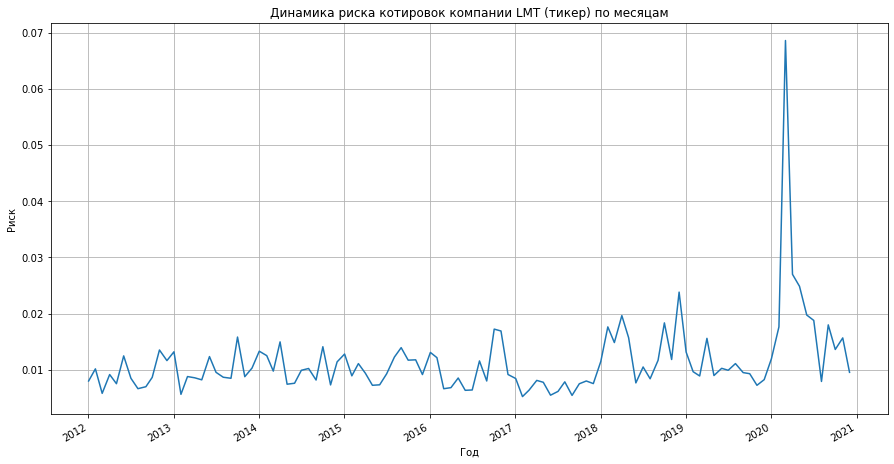

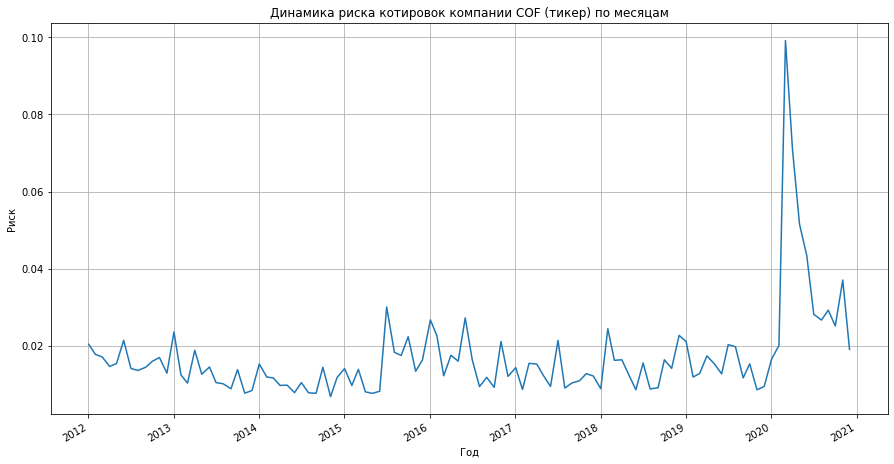

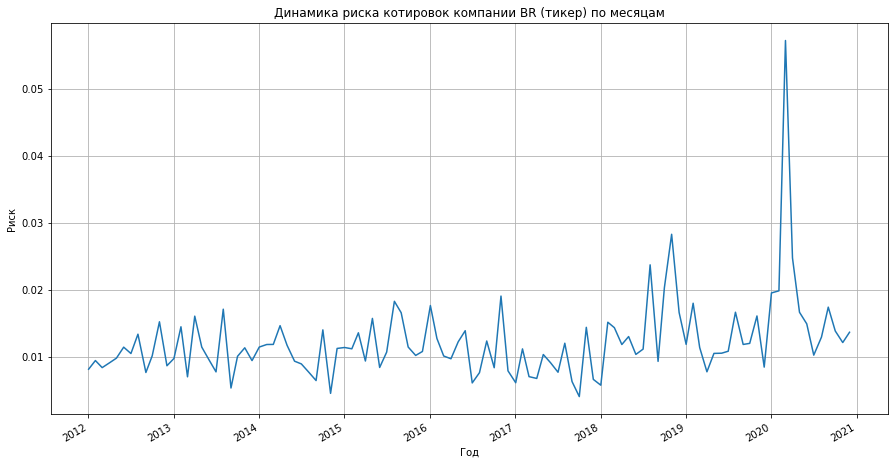

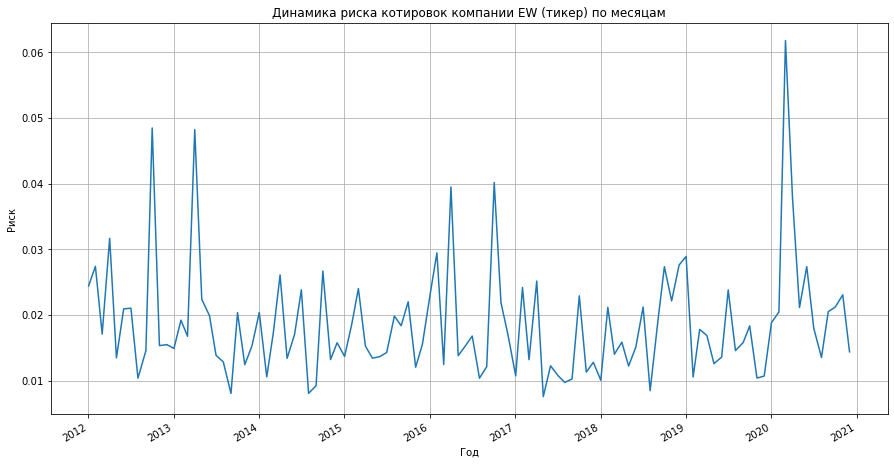

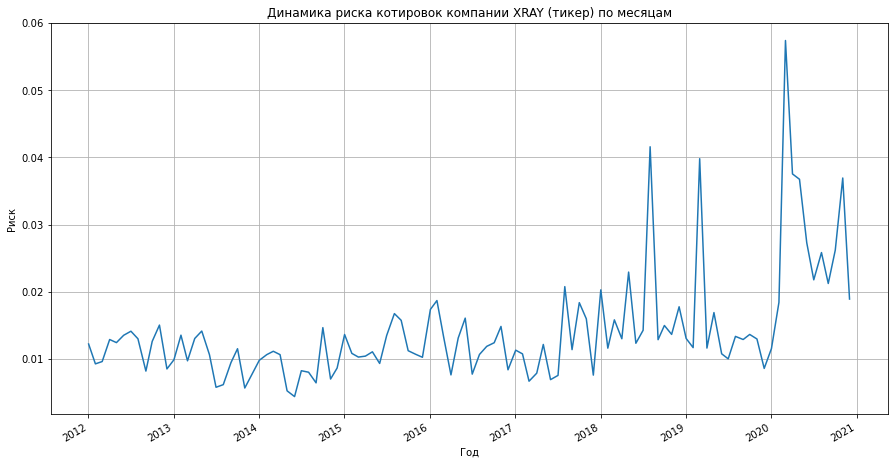

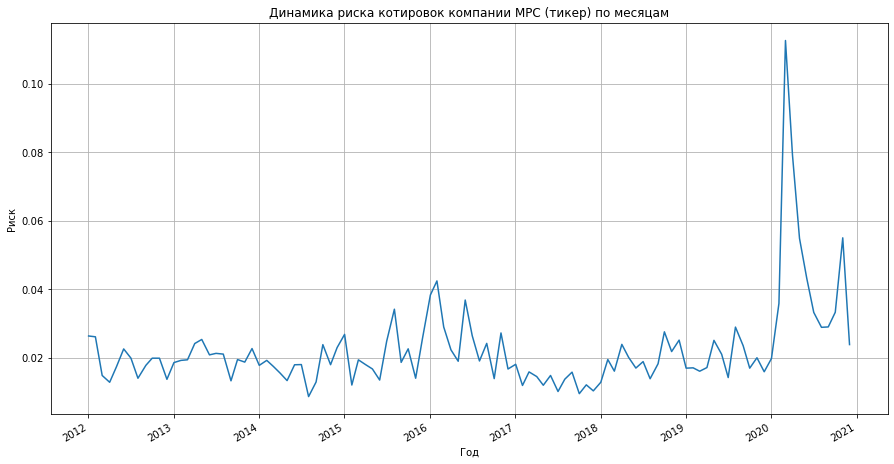

In [795]:
for name in name_company:
    plt.figure(figsize=(15, 8))
    Quotes2[name].plot()
    plt.grid()
    plt.title(f"Динамика риска котировок компании {name} (тикер) по месяцам")
    plt.ylabel('Риск')
    plt.xlabel('Год')
    plt.show()

Средний риск для многих компаний непостоянен и существенно колеблется (в коридоре порядка своего значения), однако в 2020-2021 году он в среднем увеличился в 5 раз для всех представленных здесь компаний.

## Стабильность корреляций доходностей акций (корреляций дневных доходностей, усредненных по месяцам)

In [796]:
def getCorrVar(ticker1,ticker2):
    def my_fun(x):
        return(x[ticker1].corr(x[ticker2]))
    X = Quotes1.groupby(['year','month']).apply(my_fun).drop_duplicates()
    plt.figure(figsize=(10, 8))
    X.plot()
    plt.grid()
    plt.title(f"Динамика корреляции доходностей двух компаний: {ticker1} и {ticker2}")
    plt.ylabel('Значение корреляции')
    plt.show()

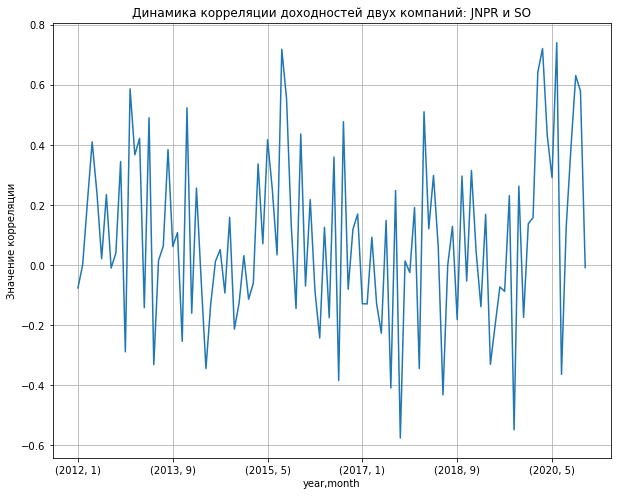

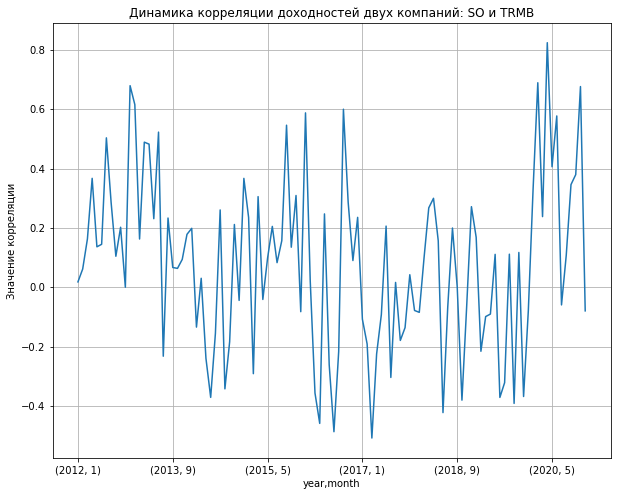

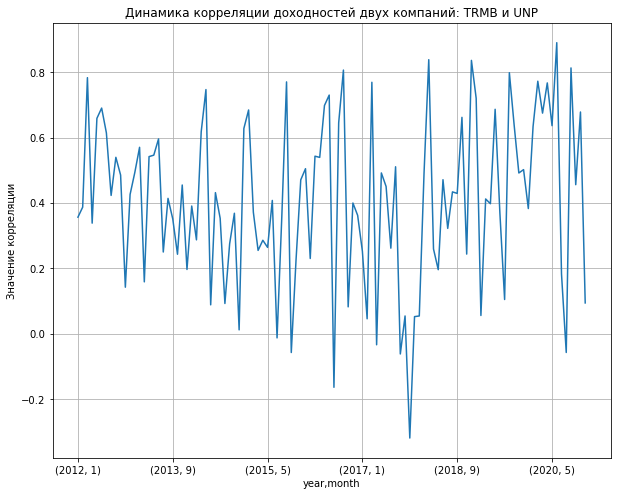

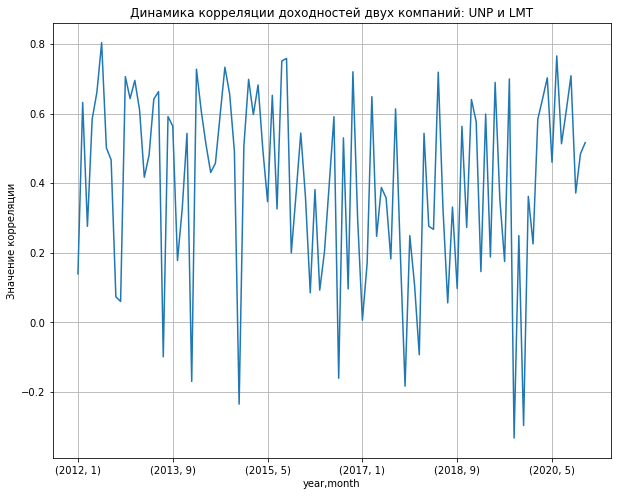

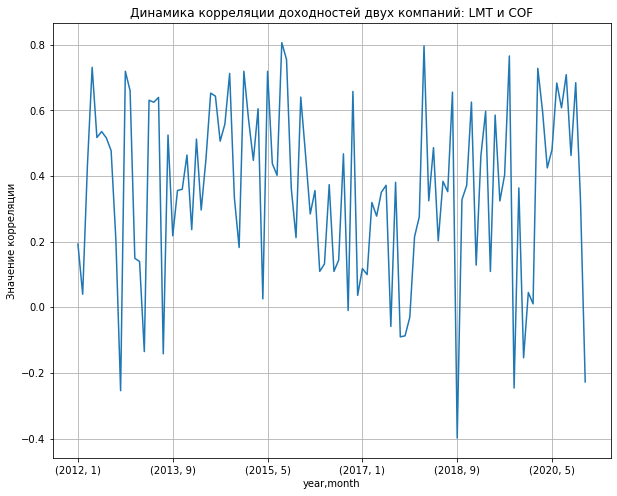

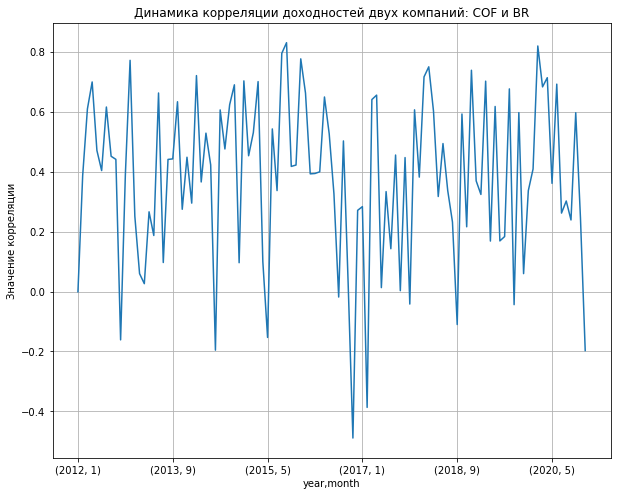

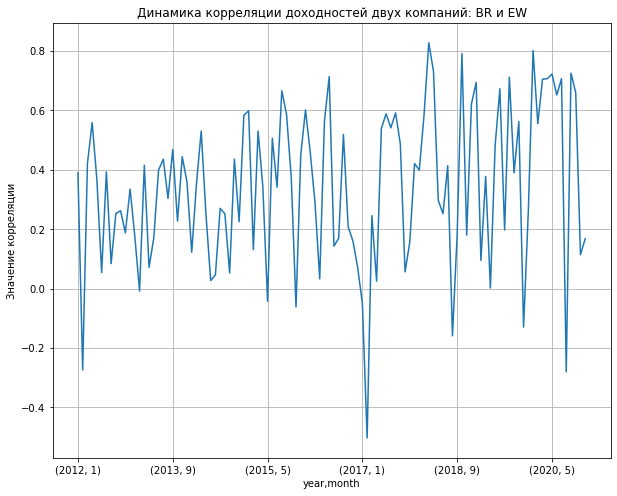

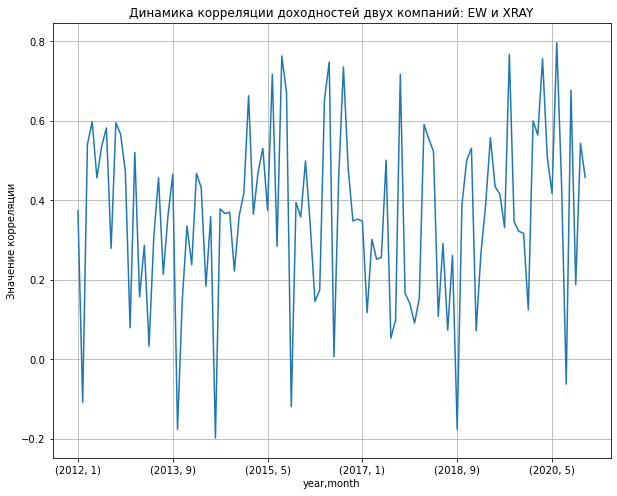

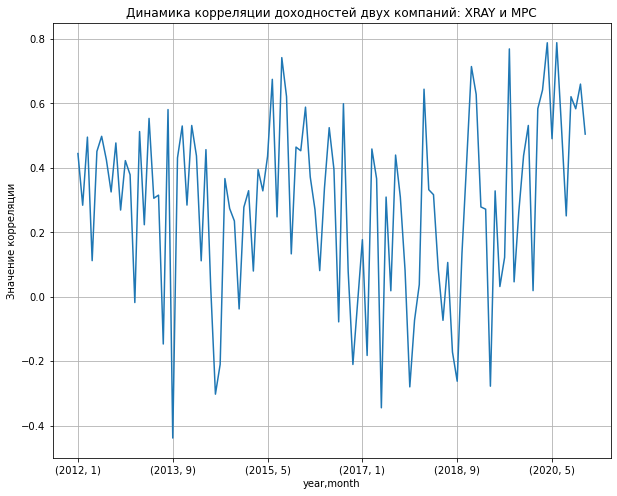

In [797]:
for i in range(len(name_company)-1):
    getCorrVar(name_company[i], name_company[i+1])

Корреляции доходностей совершенно нестабильны и напоминают белый шум, для каждой из компаний они "прыгают" из отрицательных в положительные значения и наоборот. Однако есть компании, где визуально видно, что средняя корреляция существенно отличается от 0 и она в основном положительная.

# 4.1.2. Анализ состояния финансового рынка

## Изменение средней доходности и риска по годам

In [798]:
mean_year_profit = Quotes1.groupby("year").mean().stack() \
    .reset_index().set_index(["Ticker"]) \
    .rename(columns={0: "mean_profit"}).drop(["month"], axis=0)

In [799]:
year_std = Quotes1.groupby("year").std().stack() \
    .reset_index().set_index(["Ticker"]) \
    .rename(columns={0: "std"}).drop(["month"], axis=0)

In [800]:
year = pd.concat([mean_year_profit, year_std.drop(["year"], axis=1)], axis=1)

In [801]:
year["mean_profit"] = year.mean_profit.apply(lambda x: (x+1)**252-1)
year["std"] = year["std"].apply(lambda x: np.sqrt(252)*x)

In [802]:
year

,year,mean_profit,std
Ticker,,,
A,2012,0.172588,0.291728
AAL,2012,2.135038,0.573983
AAP,2012,0.106431,0.328162
AAPL,2012,0.355347,0.295574
ABC,2012,0.152208,0.168948
...,...,...,...
YUM,2020,0.183520,0.441038
ZBH,2020,0.164629,0.500077
ZBRA,2020,0.698491,0.495598


## Что происходит на текущий момент времени с доходностью (например, последние полгода (рост, падение, колебание)) и уровень риска.

In [803]:
Quotes5=Quotes.reset_index()
Quotes5['Date'] = pd.to_datetime(Quotes5['Date'])
Quotes5 = Quotes5.pivot(index='Date', columns='Ticker', values='Close')

In [804]:
f = lambda x: x /x[0]
dataT1 = Quotes5.loc["2020-06-30":,].iloc[:, :-2].apply(f, axis=0)

In [805]:
dataT1

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-07-01,0.997058,0.980107,0.996490,0.998109,1.009778,0.986901,1.056549,1.002297,0.999395,1.010337,...,0.988424,0.990603,1.02704,0.947962,0.977415,1.020200,0.979834,0.994707,0.999832,0.981559
2020-07-02,1.003508,0.956389,0.995718,0.998109,1.007130,0.993252,1.092234,1.008750,1.004657,1.017551,...,0.990205,1.037992,1.02560,0.968493,0.985689,1.002724,1.007081,0.995973,1.010473,0.996445
2020-07-06,1.010637,0.979342,0.975500,1.024808,1.008454,0.999504,1.102045,1.016843,1.013180,1.039696,...,1.004898,1.029668,1.01728,1.037707,0.992621,1.013164,1.033713,1.018410,0.989192,1.022192
2020-07-07,1.009505,0.911247,0.959495,1.021628,1.011917,0.975489,1.095339,1.011265,1.007498,1.032276,...,0.988424,0.984964,1.01760,1.007928,0.966905,0.984339,1.017395,0.999425,0.980228,0.993397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.327487,1.198164,1.127975,1.447040,1.051742,0.962290,1.256044,1.185060,1.198305,1.148285,...,1.507124,1.535642,1.03408,1.443135,0.930232,1.176123,1.543257,1.237372,1.250419,1.472514
2020-12-28,1.333371,1.228768,1.114777,1.498794,1.053677,0.960603,1.295372,1.178935,1.209389,1.146195,...,1.500890,1.550141,1.04512,1.438358,0.933363,1.187245,1.545105,1.263146,1.247403,1.494784
2020-12-29,1.326581,1.213466,1.099965,1.478838,1.066409,0.963779,1.328573,1.184841,1.200447,1.153454,...,1.483972,1.534568,1.04672,1.421892,0.922853,1.163187,1.531866,1.259349,1.277229,1.477007


In [806]:
dataT1.mean().mean() # в среднем средний рост по всем компаниями небольшой, на 12 за полгода процентов

1.121511104347366

## В динамике

<Figure size 720x576 with 0 Axes>

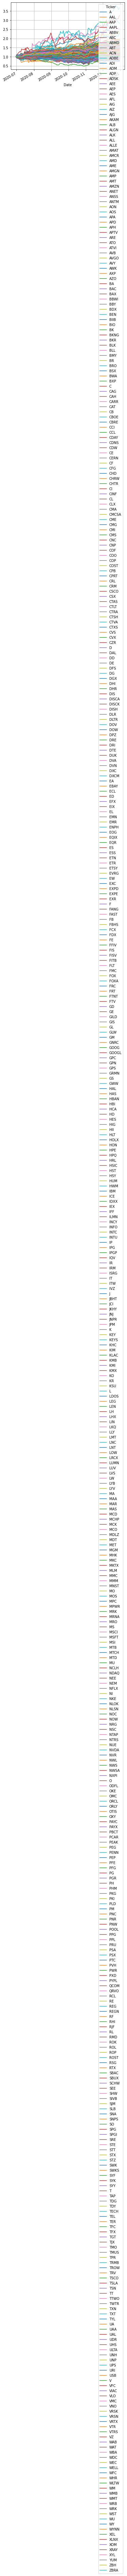

In [807]:
plt.figure(figsize=(10, 8))
dataT1.plot()
plt.grid()
plt.show()

## Лидеры, аутсайдеры

In [808]:
dataT1.iloc[-1].sort_values(ascending=False).head(10)

Ticker
ENPH    3.688669
TSLA    3.267565
PENN    2.828094
BBWI    2.484302
TPR     2.340361
FCX     2.248920
PVH     1.954006
ALGN    1.947165
ALB     1.910633
MGM     1.875595
Name: 2020-12-31 00:00:00, dtype: float64

In [809]:
dataT1.iloc[-1].sort_values(ascending=False).tail(10)

Ticker
IFF     0.888780
JKHY    0.880237
CTXS    0.879589
AMT     0.868183
INCY    0.836587
INTC    0.832693
VRTX    0.814095
FE      0.789324
REGN    0.774649
GILD    0.757213
Name: 2020-12-31 00:00:00, dtype: float64

## Посчитаем полугодовую доходность через сложные проценты

In [810]:
year_profit = (Quotes1.loc["2020-06-30":,].iloc[:, :-2]+1).product(axis=0)-1

In [811]:
year_profit.sort_values(inplace=True, ascending=False)

In [812]:
year_profit.head(10)

Ticker
ENPH    2.697998
TSLA    2.495666
PENN    1.900269
BBWI    1.459656
FCX     1.356884
TPR     1.328090
ALGN    1.005329
ALB     0.932661
FDX     0.929543
PVH     0.929115
dtype: float64

In [813]:
year_profit.tail(10)

Ticker
CTXS   -0.101643
IFF    -0.106990
JKHY   -0.107395
AMT    -0.115603
INTC   -0.145015
INCY   -0.151249
VRTX   -0.171260
FE     -0.194262
REGN   -0.209144
GILD   -0.218616
dtype: float64

## Уровень риска за полгода

In [814]:
Quotes1.loc["2020-06-30":,].iloc[:, :-2].std()*np.sqrt(129)

Ticker
A       0.154354
AAL     0.461472
AAP     0.158518
AAPL    0.283140
ABBV    0.172816
          ...   
YUM     0.151006
ZBH     0.236015
ZBRA    0.238144
ZION    0.401191
ZTS     0.158204
Length: 502, dtype: float64

## Перейдем к секторам. Оценим риск и доходности по годам по разным секторам и дадим комментарии полученным данным. 

In [815]:
Companies.reset_index()

,Ticker,Name,idSector
0,A,"Agilent Technologies, Inc.",0
1,AAL,American Airlines Group Inc.,1
2,AAP,"Advance Auto Parts, Inc.",2
3,AAPL,Apple Inc.,3
4,ABBV,AbbVie Inc.,0
...,...,...,...
498,YUM,"Yum! Brands, Inc.",2
499,ZBH,"Zimmer Biomet Holdings, Inc.",0
500,ZBRA,Zebra Technologies Corporation,3
501,ZION,"Zions Bancorporation, National Association",6


In [816]:
df = pd.merge(Sector, Companies, left_index=True, right_on="idSector")[["Name_x"]].rename(columns={"Name_x": "Sector"})

In [817]:
df1 = pd.merge(df, year, left_index=True, right_index=True).set_index(["year"])

In [818]:
df1

,Sector,mean_profit,std
year,,,
2012,Healthcare,0.172588,0.291728
2013,Healthcare,0.431048,0.221095
2014,Healthcare,0.025683,0.221421
2015,Healthcare,0.047368,0.225122
2016,Healthcare,0.120125,0.234376
...,...,...,...
2016,Healthcare,0.145143,0.223574
2017,Healthcare,0.362094,0.148097
2018,Healthcare,0.221238,0.235007


## Оценим риск и доходности по годам по разным секторам: с 2012 по 2021 год, взял средние значения по годам

In [819]:
sector_profit = df1.groupby("Sector").mean() # средняя доходность
sector_profit.sort_values(by="mean_profit", ascending=False, inplace=True)

### Лидер по средней доходности

In [820]:
sector_profit.head(1)

,mean_profit,std
Sector,,
Technology,0.361701,0.314981


### Аутсайдер по средней доходности

In [821]:
sector_profit.tail(1)

,mean_profit,std
Sector,,
Energy,0.09445,0.35696
